In [1]:
import pandas as pd
import numpy as np
from fancyimpute import IterativeImputer
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,f1_score,balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.stats import randint
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('link1.csv')

In [3]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
df.shape

(918, 12)

In [5]:
df=df.drop_duplicates()

In [6]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [7]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [10]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [11]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# XGBoost

In [14]:
import xgboost as xgb

In [15]:
params = {"objective": "binary:logistic", "num_class": 1,'learning_rate':0.01,'seed':42,'n_estimators':100,
          'max_depth': 6,'subsample':1,'reg_lambda':0.1,'colsample_bytree':0.6}

model = xgb.XGBClassifier(**params)

evals = [(X_train, y_train)]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")

print("Cross-Validation accuracy Scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

Cross-Validation accuracy Scores: [0.85714286 0.80952381 0.88435374 0.89115646 0.87671233]
Mean accuracy: 0.8637778399030844


In [16]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=1,
              num_parallel_tree=None, ...)

In [17]:
y_pred_xg = model.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_xg)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[72 10]
 [ 8 94]]


In [19]:
accuracy_score(y_train, model.predict(X_train))

0.946866485013624

In [20]:
accuracy_XG = accuracy_score(y_test, y_pred_xg)
precision_XG = precision_score(y_test, y_pred_xg, pos_label=1)
recall_XG = recall_score(y_test, y_pred_xg, pos_label=1)
f1_XG = f1_score(y_test, y_pred_xg, pos_label=1)

In [21]:
print(f'Accuracy:{accuracy_XG}\nPrecision:{precision_XG}\nRecall:{recall_XG}\nf1:{f1_XG}')

Accuracy:0.9021739130434783
Precision:0.9038461538461539
Recall:0.9215686274509803
f1:0.9126213592233009


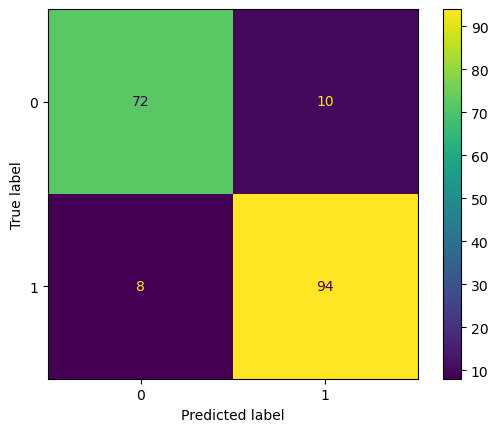

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred_xg)
ConfusionMatrixDisplay(conf_matrix).plot();

# Random Forest

In [139]:
rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=7,min_samples_leaf=2,random_state=42)

In [140]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
cross_val_scores

array([0.85714286, 0.80952381, 0.88435374, 0.89115646, 0.87671233])

In [141]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, random_state=42)

In [142]:
y_pred_rf = rf_classifier.predict(X_test)

In [143]:
accuracy_score(y_train, rf_classifier.predict(X_train))

0.9427792915531336

In [147]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label=1)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1)

In [148]:
print(f'Accuracy:{accuracy_rf}\nPrecision:{precision_rf}\nRecall:{recall_rf}\nf1:{f1_rf}')

Accuracy:0.8967391304347826
Precision:0.8878504672897196
Recall:0.9313725490196079
f1:0.9090909090909091


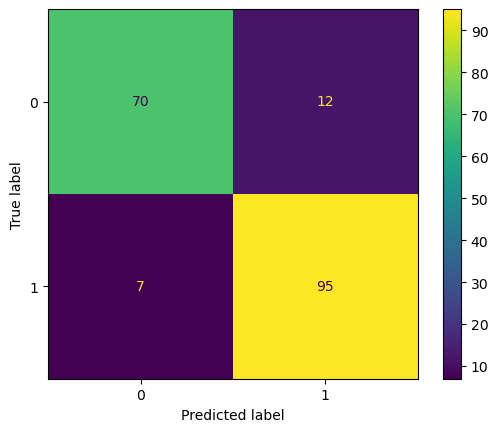

In [149]:
cm = confusion_matrix(y_test, y_pred_rf)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Stack Classifier

In [487]:
clf1 = LogisticRegression(C=1)
clf2 = DecisionTreeClassifier(max_depth=35)
clf3 = KNeighborsClassifier(n_neighbors=7,weights='uniform',p=1)

In [488]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


stacking_classifier = StackingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)],
    final_estimator=LogisticRegression(),
    stack_method='auto',
)

In [489]:
stacking_classifier.fit(X_train_normalized, y_train)

y_pred_sc = stacking_classifier.predict(X_test)

In [490]:
accuracy_score(y_train, stacking_classifier.predict(X_train_normalized))

0.8756388415672913

In [491]:
accuracy_sc = accuracy_score(y_test, y_pred_sc)
precision_sc = precision_score(y_test, y_pred_sc, pos_label=1)
recall_sc = recall_score(y_test, y_pred_sc, pos_label=1)
f1_sc = f1_score(y_test, y_pred_sc, pos_label=1)

In [492]:
print(f'Accuracy:{accuracy_sc}\nPrecision:{precision_sc}\nRecall:{recall_sc}\nf1:{f1_sc}')

Accuracy:0.5170068027210885
Precision:0.9166666666666666
Recall:0.13580246913580246
f1:0.23655913978494622


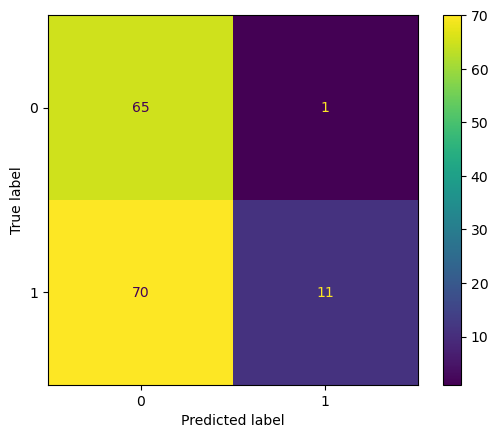

In [493]:
cm = confusion_matrix(y_test, y_pred_sc)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# SVM